# PPS - Etapa II

## Librerías

In [1]:
#Librerías generales
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


In [2]:
#Modelos de regresión

from sklearn import svm
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error

In [3]:
#Redes neuronales

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from keras.regularizers import l2
from keras.utils import to_categorical
from tensorflow.keras.metrics import Precision, Recall, AUC, F1Score, Accuracy
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [4]:
#Modelos de clasificación

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from joblib import dump
from joblib import load
from sklearn.ensemble import ExtraTreesClassifier

## Modelos de regresión

Comiendo el análisis predictivo con modelos de regresión.

### Modelos tradicionales

#### Datos

Cargo los datos con la columna 8 como target ya que es ELAPSED_DAYS y contiene la cantidad de días que le llevó al soporte resolver el ticket.

In [5]:
datos=np.loadtxt('..\Archivos\data_req_inc_3.csv',delimiter=',',skiprows=1, usecols=(0,1,2,3,4,5,6,7,9,10,11,12,8))

x=datos[:,0:-1]

y=datos[:,-1]

Divido los datos en conjuntos de train:test 80:20

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=369)

scaler = StandardScaler()
x_train_s = scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

Aplico el entrenamiento y evaluación con Support Vectors, KNN Regressor y Random Forest

#### Support Vectors

In [7]:
regr = svm.SVR(kernel='poly', C=0.5, epsilon=0.3, gamma='auto', coef0 = 2, degree = 4)

regr.fit(x_train_s, y_train)


SVR(C=0.5, coef0=2, degree=4, epsilon=0.3, gamma='auto', kernel='poly')

In [8]:
y_pred = regr.predict(x_test_s)

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
corr, _ = pearsonr(y_test, y_pred)

print(f'Coeficiente de Pearson: {corr}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')

Coeficiente de Pearson: 0.3323576909277397
MAE: 18.6523497233098
MSE: 1025.0164821554442
R^2: 0.011086650638258644


#### KNN Regressor

In [11]:
knn_regressor = KNeighborsRegressor(n_neighbors=10, weights='distance', metric = 'manhattan') 
knn_regressor.fit(x_train_s, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=10, weights='distance')

In [12]:
y_pred = knn_regressor.predict(x_test_s)

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
corr, _ = pearsonr(y_test, y_pred)

print(f'Coeficiente de Pearson: {corr}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')

Coeficiente de Pearson: 0.5930867366687325
MAE: 15.847642800839193
MSE: 702.9641608386487
R^2: 0.32179564438380315


#### Random Forest

In [14]:
random_forest_regressor = RandomForestRegressor(n_estimators=150, random_state=42)  
random_forest_regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [15]:
y_pred = random_forest_regressor.predict(x_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
corr, _ = pearsonr(y_test, y_pred)

print(f'Coeficiente de Pearson: {corr}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')

Coeficiente de Pearson: 0.6301317403325453
MAE: 16.985540661666164
MSE: 645.5985504645688
R^2: 0.3771407231028485


### Redes neuronales

#### Datos

Cargo nuevamente el dataset pero esta vez lo separo en train:valid:test 80:10:10

In [24]:
datos=np.loadtxt('..\Archivos\data_req_inc_3.csv',delimiter=',',skiprows=1, usecols=(0,1,2,3,4,5,6,7,9,10,11,12,8))

x=datos[:,0:-1]

y=datos[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=19)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=12)

scaler = StandardScaler()
scaler.fit(x_train)
x_train= scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

Exploro las dimensiones de los conjuntos creados

In [813]:
x_train.shape

(1991, 12)

In [814]:
x_test.shape

(249, 12)

In [815]:
x_val.shape

(249, 12)

#### Entrenamiento y evaluación

Defino las estructuras de redes neuronales a utilizar

In [113]:
#model1
model = keras.Sequential()

model.add(keras.layers.Dense(units=64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=1, activation='linear'))

In [116]:
#model2
model = keras.Sequential()

model.add(keras.layers.Dense(units=64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=1, activation='linear'))

In [57]:
#model4
model = keras.Sequential()

model.add(keras.layers.Dense(units=64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=1, activation='linear'))

In [109]:
#model5
model = keras.Sequential()

model.add(keras.layers.Dense(units=64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(keras.layers.Dense(units=1024, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(units=1024, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=1, activation='linear'))

In [7]:
#model6
model = keras.Sequential()

model.add(keras.layers.Dense(units=64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(units=1, activation='linear'))

In [8]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_absolute_error'])


In [ ]:
model.fit(x_train, y_train, epochs=400, batch_size=64, validation_data=(x_val, y_val))


Resumen del último epoch:

Epoch 400/400
32/32 [==============================] - 0s 3ms/step - loss: 727.5162 - mean_absolute_error: 18.3837 - val_loss: 961.5626 - val_mean_absolute_error: 21.2849


Evaluo el modelo 6 con el conjunto de test.

In [10]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')

8/8 [==============================] - 0s 1ms/step
MAE: 17.718842983724603
MSE: 651.8544430393105
R^2: 0.08721332251541614


Los modelos explorados tienen un error promedio de 17 días.

## Modelos de clasificación

Inicio el análisis con modelos de clasificación

### Modelos tradicionales

##### Datos para clasificación con modelos tradicionales

Cargo los datos para los modelos de clasificación. En este caso el target es la columna 13 DAYS_RANGE que contiene la clasiicación a la que pertenece cada registro.

In [5]:
datos=np.loadtxt('..\Archivos\data_req_inc_3.csv',delimiter=',',skiprows=1, usecols=(0,1,2,3,4,5,6,7,9,10,11,12,13))

x=datos[:,0:-1]

y=datos[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=369, stratify=y)

scaler = StandardScaler()
x_train_s = scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)


#### Función para predecir

Creo una función porque voy a usar el mismo procedimiento para los siguientes modelos: Regresión logística, Decision Trees, Random Forest y Search Grid con Random Forest.

In [6]:
def Aplicar_Modelo(modelo,nombre_modelo, x_train, y_train, x_test, y_test):
    
    modelo.fit(x_train, y_train)

    y_pred = modelo.predict(x_test)

    print(f'******Modelo: {nombre_modelo}******')

    class_report = classification_report(y_test, y_pred)

    print(class_report)

    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Clase Predicha")
    plt.ylabel("Clase Real")
    plt.title("Matriz de Confusión")
    
    return plt.show()

#### Regresión logística

******Modelo: Logistic Regression******
              precision    recall  f1-score   support

         0.0       0.48      0.57      0.52       189
         1.0       0.26      0.04      0.07       122
         2.0       0.52      0.71      0.60       187

    accuracy                           0.49       498
   macro avg       0.42      0.44      0.40       498
weighted avg       0.44      0.49      0.44       498



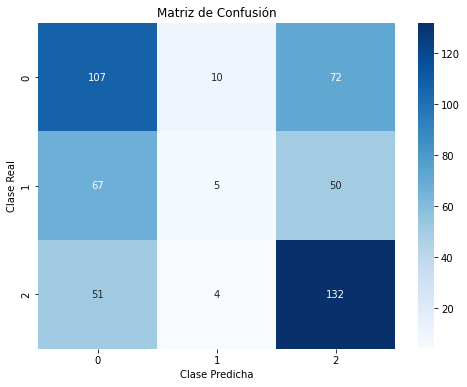

In [19]:
logistic_R = LogisticRegression(multi_class='multinomial', solver='lbfgs')

Aplicar_Modelo(logistic_R, 'Logistic Regression',x_train_s, y_train, x_test_s, y_test)

#### Decision Trees

******Modelo: Decision Tree Classifier******
              precision    recall  f1-score   support

         0.0       0.58      0.60      0.59       189
         1.0       0.37      0.39      0.38       122
         2.0       0.63      0.60      0.62       187

    accuracy                           0.55       498
   macro avg       0.53      0.53      0.53       498
weighted avg       0.55      0.55      0.55       498



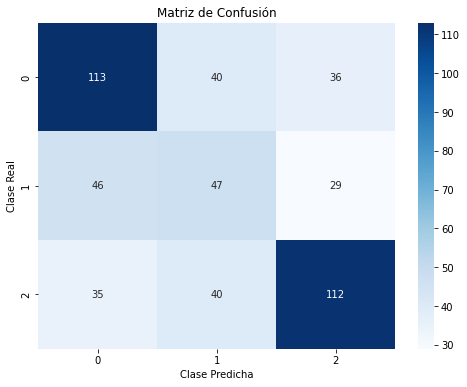

In [39]:
decision_tree = DecisionTreeClassifier()

Aplicar_Modelo(decision_tree, 'Decision Tree Classifier',x_train, y_train, x_test, y_test)


******Modelo: Decision Tree Classifier******
              precision    recall  f1-score   support

         0.0       0.57      0.58      0.58       189
         1.0       0.44      0.49      0.47       122
         2.0       0.66      0.60      0.63       187

    accuracy                           0.57       498
   macro avg       0.56      0.56      0.56       498
weighted avg       0.57      0.57      0.57       498



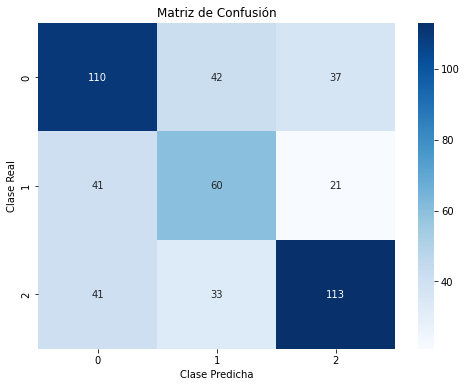

In [8]:
decision_tree = DecisionTreeClassifier(max_depth=50, min_samples_split= 2 ,
                                       min_samples_leaf= 1,max_features = 5, 
                                       class_weight = 'balanced', criterion = 'entropy',
                                       splitter = 'random')

Aplicar_Modelo(decision_tree, 'Decision Tree Classifier',x_train, y_train, x_test, y_test)

#### Random Forest

******Modelo: Random Forest******
              precision    recall  f1-score   support

         0.0       0.62      0.71      0.66       189
         1.0       0.56      0.36      0.44       122
         2.0       0.66      0.71      0.68       187

    accuracy                           0.63       498
   macro avg       0.61      0.60      0.60       498
weighted avg       0.62      0.63      0.62       498



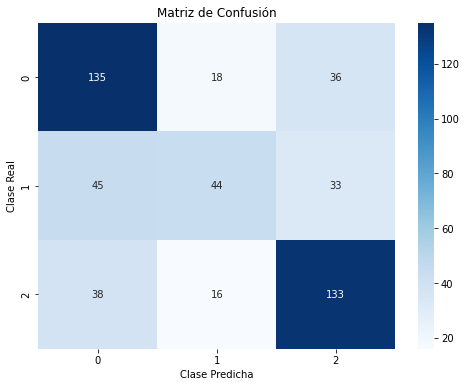

In [40]:
random_forest = RandomForestClassifier(n_estimators=100)

Aplicar_Modelo(random_forest, 'Random Forest',x_train, y_train, x_test, y_test)

******Modelo: Random Forest******
              precision    recall  f1-score   support

         0.0       0.61      0.71      0.66       189
         1.0       0.61      0.43      0.50       122
         2.0       0.65      0.67      0.66       187

    accuracy                           0.63       498
   macro avg       0.62      0.60      0.61       498
weighted avg       0.63      0.63      0.62       498



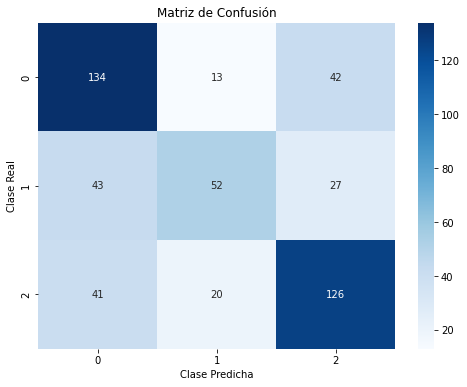

In [42]:
random_forest = RandomForestClassifier(n_estimators=200, class_weight= 'balanced', bootstrap= True,
                                       oob_score = True, max_depth=20, min_samples_split= 2, 
                                       min_samples_leaf= 1,max_features = 5)

Aplicar_Modelo(random_forest, 'Random Forest',x_train, y_train, x_test, y_test)

##### Grid Search Random Forest

In [ ]:
random_forest = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 150, 200, 250, 300, 350],
    'max_depth': [None, 5,10,15, 20, 25, 30],
    'min_samples_split': [2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15,20],
    'min_samples_leaf': [1, 2, 4, 5, 6, 7, 8, 9, 10],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}


grid = GridSearchCV(estimator=random_forest, param_grid=param_grid, scoring='accuracy', cv=3)
grid_result = grid.fit(x_train, y_train) 
print("Mejor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor: 0.546369 usando {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 20, 'n_estimators': 200}

### Redes neuronales

##### Datos

Cargo los datos nuevamente y separo en train:valid:test 80:10:10

In [16]:
datos=np.loadtxt('..\Archivos\data_req_inc_3.csv',delimiter=',',skiprows=1, usecols=(0,1,2,3,4,5,6,7,9,10,11,12,13))

x=datos[:,0:-1]

y=datos[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=162, stratify=y)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=162, stratify=y_test)

scaler = StandardScaler()
scaler.fit(x_train)
x_train= scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

y_train_one_hot = to_categorical(y_train, num_classes=3)
y_val_one_hot = to_categorical(y_val, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

Observo las dimensiones.

In [7]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

print(y_train_one_hot.shape)
print(y_test_one_hot.shape)

(1991, 12)
(249, 12)
(249, 12)
(1991, 3)
(249, 3)


In [145]:
datos_1 = pd.read_csv('..\Archivos\data_req_inc_3.csv', delimiter=',',encoding = 'latin-1')
conteo_clases = datos_1['DAYS_RANGE'].value_counts()
conteo_clases

DAYS_RANGE
0    946
2    932
1    611
Name: count, dtype: int64

##### Entrenamiento y evaluación

Defino varias estructuras de redes neuronales para el entrenamiento.

In [147]:
#Modelo 1

M = 1

model = keras.Sequential()
model.add(keras.layers.Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(3, activation='softmax')) 

initial_learning_rate = 0.001  
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['accuracy', Precision(), Recall()])





In [35]:
#Modelo 2

M = 2

model = keras.Sequential()
model.add(keras.layers.Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(64, activation='relu')) 
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(3, activation='softmax')) 


initial_learning_rate = 0.001 
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['accuracy', Precision(), Recall()])




In [153]:
#Modelo 3

M = 3

model = keras.Sequential()
model.add(keras.layers.Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(64, activation='relu')) 
model.add(keras.layers.Dense(3, activation='softmax')) 


initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['accuracy', Precision(), Recall()])



In [155]:
#Modelo 4

M = 4

model = keras.Sequential()
model.add(keras.layers.Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(3, activation='softmax')) 


initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['accuracy', Precision(), Recall()])



In [158]:
#Modelo 5

M = 5

model = keras.Sequential()
model.add(keras.layers.Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(128, activation='relu',
                            kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dense(64, activation='relu')) 
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(3, activation='softmax'))

initial_learning_rate = 0.001 
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['accuracy', Precision(), Recall()])


In [160]:
#Modelo 6
M = 6

model = keras.Sequential()
model.add(keras.layers.Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.05))
model.add(keras.layers.Dense(128, activation='relu'))
#model.add(keras.layers.Dropout(0.05))
model.add(keras.layers.Dense(128, activation='relu')) 
model.add(keras.layers.Dropout(0.05))
model.add(keras.layers.Dense(3, activation='softmax')) 

initial_learning_rate = 0.001 
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['accuracy', Precision(), Recall()])


In [38]:
#Modelo 9

M = 9

i = 0

model = keras.Sequential()
model.add(keras.layers.Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.AlphaDropout(0.10)) 
model.add(keras.layers.Dense(128, activation='relu')) 
model.add(keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.AlphaDropout(0.05)) 
model.add(keras.layers.Dense(128, activation='relu')) 
model.add(keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.AlphaDropout(0.05)) 
model.add(keras.layers.Dense(3, activation='softmax')) 

initial_learning_rate = 0.001 
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['accuracy', 'Precision', 'Recall'])


In [41]:
#Modelo 12

M = 12

i = 0

model = keras.Sequential()
model.add(keras.layers.Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(keras.layers.Dense(64, activation='relu',
                            kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01))) 
model.add(keras.layers.Dense(64, activation='relu',
                            kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(keras.layers.Dense(64, activation='relu')) 
model.add(keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(keras.layers.Dense(3, activation='softmax')) 

initial_learning_rate = 0.001 
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['accuracy', 'Precision', 'Recall'])


Fit normal

In [ ]:
f = 1 #Fit normal 
epoc = 1000
batch = 256

hist = model.fit(x_train, y_train_one_hot, epochs=epoc, batch_size=batch,validation_data=(x_val, y_val_one_hot))

Fit con peso en la categoría que más le cuesta '6-15'

In [ ]:
f = 2 #Fit con peso en la categoría que cuesta más


#Fit con peso en la clase que le cuesta más

#{'<5': 0, '6-15': 1, '16<' : 2}

class_weights = {
    0: 1.0,   
    1: 2.0,  
    2: 1.0
}

epoc = 500
batch = 256


model.fit(x_train, y_train_one_hot, epochs=epoc, batch_size=batch,validation_data=(x_val, y_val_one_hot),
          class_weight=class_weights)

Fit con peso en la clase que le cuesta más y early stopping

In [ ]:
f = 3 #Fit con peso en la clase que le cuesta más y early stopping


#Fit con peso en la clase que le cuesta más

#{'<5': 0, '6-15': 1, '16<'

class_weights = {
    0: 1.0,   
    1: 2.0,  
    2: 1.0
}

epoc = 1000
batch = 256

early_stopping = EarlyStopping(monitor='val_accuracy', patience=2000, restore_best_weights=True)

model.fit(x_train, y_train_one_hot, epochs=epoc, batch_size=batch,validation_data=(x_val, y_val_one_hot),
          class_weight=class_weights, callbacks=[early_stopping])

MODELO: 12 - FIT: 2
Epochs = 500 - Batch Size = 256
1/8 [==>...........................] - ETA: 0s - loss: 1.8752 - accuracy: 0.5000 - precision: 0.5161 - recall: 0.5000

8/8 [==============================] - 0s 2ms/step
Loss: 1.97
Accuracy: 0.53
Precision: 0.53
Recall: 0.52
F1 Score: 0.53
              precision    recall  f1-score   support

          <5       0.58      0.60      0.59        94
        5-15       0.38      0.44      0.41        61
         15<       0.59      0.51      0.55        94

    accuracy                           0.53       249
   macro avg       0.52      0.52      0.51       249
weighted avg       0.54      0.53      0.53       249



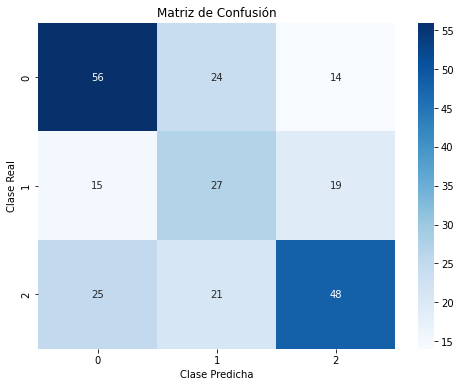

In [43]:
#Evaluación

print(f'MODELO: {M} - FIT: {f}')
print(f'Epochs = {epoc} - Batch Size = {batch}')

evaluation = model.evaluate(x_test, y_test_one_hot)
y_pred = model.predict(x_test)

y_pred = np.argmax(y_pred, axis=1)

targets = ['<5', '5-15', '15<']

print(f"Loss: {evaluation[0]:.2f}")
print(f"Accuracy: {evaluation[1]:.2f}")
print(f"Precision: {evaluation[2]:.2f}")
print(f"Recall: {evaluation[3]:.2f}")

f1_score = 2 * (evaluation[2] * evaluation[3]) / (evaluation[2] + evaluation[3])

print(f"F1 Score: {f1_score:.2f}")


report = classification_report(y_test, y_pred, target_names=targets)

print(report)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Clase Predicha")
plt.ylabel("Clase Real")
plt.title("Matriz de Confusión")
    
plt.show()

### Clasificación + SMOTE

AUMENTO un 40% la clase con menos registros, que es la que más le cuesta detectar. La clase 6-15 pasará de 611 a 850. Esos 239 datos extra forman solo el 8,75% de los datos finales

#### Aumento de datos 

Agrego datos sintéticos a la clase '6-15' ya que es la que menos registros de ejemplo contiene

In [17]:
smote = SMOTE(sampling_strategy={1: 850}, random_state=191215) 

X_resampled, y_resampled = smote.fit_resample(x, y)



Divido el conjunto en train:test:valid 80:10:10

In [18]:
x_train_r, x_test_r1, y_train_r, y_test_r1 = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=12, stratify=y_resampled)

x_val_r, x_test_r, y_val_r, y_test_r = train_test_split(x_test_r1, y_test_r1, test_size=0.5, random_state=15, stratify= y_test_r1)

scaler = StandardScaler()
scaler.fit(x_train_r)

x_train_s_r = scaler.transform(x_train_r)
x_test_s_r = scaler.transform(x_test_r)
x_val_s_r = scaler.transform(x_val_r)

y_train_one_hot_r = to_categorical(y_train_r, num_classes=3)
y_val_one_hot_r = to_categorical(y_val_r, num_classes=3)
y_test_one_hot_r = to_categorical(y_test_r, num_classes=3)

Exploro la cantidad de registros en el nuevo dataset con datos aumentados en la clase 1

In [52]:
datos_smote = pd.DataFrame(X_resampled)

datos_smote.columns = ['Requester', 'Ticket Type', 'Requester Group', 'Priority', 'Impact', 'Category', 'Requester City', 'End User', 'Data Model',
          'Requester Country', 'Week Day', 'Open Date']

datos_smote['DAYS_RANGE'] = y_resampled  

conteo_clases = datos_smote['DAYS_RANGE'].value_counts()


print(conteo_clases)

DAYS_RANGE
0.0    946
2.0    932
1.0    850
Name: count, dtype: int64


Cantidad de registros por clase en el conjunto de entrenamiento

In [47]:
datos_smote = pd.DataFrame(x_train_r)

datos_smote.columns = ['Requester', 'Ticket Type', 'Requester Group', 'Priority', 'Impact', 'Category', 'Requester City', 'End User', 'Data Model',
          'Requester Country', 'Week Day', 'Open Date']

datos_smote['DAYS_RANGE'] = y_train_r  

conteo_clases = datos_smote['DAYS_RANGE'].value_counts()


print(conteo_clases)

DAYS_RANGE
0.0    757
2.0    745
1.0    680
Name: count, dtype: int64


Cantidad de registros por clase en el conjunto de test

In [48]:
datos_smote = pd.DataFrame(x_test_r)

datos_smote.columns = ['Requester', 'Ticket Type', 'Requester Group', 'Priority', 'Impact', 'Category', 'Requester City', 'End User', 'Data Model',
          'Requester Country', 'Week Day', 'Open Date'] 

datos_smote['DAYS_RANGE'] = y_test_r  

conteo_clases = datos_smote['DAYS_RANGE'].value_counts()

print(conteo_clases)

DAYS_RANGE
2.0    94
0.0    94
1.0    85
Name: count, dtype: int64


#### Redes Neuronales

Entrenamiento y evaluación con diferentes estructuras y configuraciones

In [404]:
#Modelo 6
M = 6

i = 0

total_epochs = 0


model = keras.Sequential()
model.add(keras.layers.Dense(64, input_dim=x_train_s_r.shape[1], activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu')) 
model.add(keras.layers.Dropout(0.05))
model.add(keras.layers.Dense(3, activation='softmax')) 

initial_learning_rate = 0.001 
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['accuracy', 'Precision', 'Recall'])


In [440]:
#Modelo 7
M = 7

i = 0

total_epochs = 0


model = keras.Sequential()
model.add(keras.layers.Dense(128, input_dim=x_train_s_r.shape[1], activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu')) 
model.add(tf.keras.layers.AlphaDropout(0.05)) 
model.add(keras.layers.Dense(3, activation='softmax')) 

initial_learning_rate = 0.001 
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['accuracy', 'Precision', 'Recall'])


In [272]:
#Modelo 8
M = 8

i = 0

total_epochs = 0


model = keras.Sequential()
model.add(keras.layers.Dense(128, input_dim=x_train_s_r.shape[1], activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.AlphaDropout(0.2)) 
model.add(keras.layers.Dense(128, activation='relu')) 
model.add(keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.AlphaDropout(0.2)) 
model.add(keras.layers.Dense(3, activation='softmax')) 

initial_learning_rate = 0.001 
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['accuracy', 'Precision', 'Recall'])


In [358]:
#Modelo 9

M = 9

i = 0

total_epochs = 0

model = keras.Sequential()
model.add(keras.layers.Dense(128, input_dim=x_train_s_r.shape[1], activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.AlphaDropout(0.10)) 
model.add(keras.layers.Dense(128, activation='relu')) 
model.add(keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.AlphaDropout(0.05)) 
model.add(keras.layers.Dense(128, activation='relu')) 
model.add(keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.AlphaDropout(0.05)) 
model.add(keras.layers.Dense(3, activation='softmax')) 

initial_learning_rate = 0.001 
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['accuracy', 'Precision', 'Recall'])


In [341]:
#Modelo 10

M = 10

i = 0

total_epochs = 0

model = keras.Sequential()
model.add(keras.layers.Dense(128, input_dim=x_train_s_r.shape[1], activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4)) 
model.add(keras.layers.Dense(128, activation='relu')) 
model.add(keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4)) 
model.add(keras.layers.Dense(128, activation='relu')) 
model.add(keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(keras.layers.Dense(3, activation='softmax')) 

initial_learning_rate = 0.001 
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['accuracy', 'Precision', 'Recall'])


In [345]:
#Modelo 11

M = 11

i = 0

total_epochs = 0

model = keras.Sequential()
model.add(keras.layers.Dense(128, input_dim=x_train_s_r.shape[1], activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(keras.layers.Dense(256, activation='relu',
                            kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01))) 
model.add(keras.layers.Dense(256, activation='relu',
                            kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(keras.layers.Dense(128, activation='relu')) 
model.add(keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(keras.layers.Dense(3, activation='softmax')) 

initial_learning_rate = 0.001 
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['accuracy', 'Precision', 'Recall'])


In [2511]:
#Modelo 12

M = 12

i = 0

total_epochs = 0

model = keras.Sequential()
model.add(keras.layers.Dense(64, input_dim=x_train_s_r.shape[1], activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(keras.layers.Dense(64, activation='relu',
                            kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01))) 
model.add(keras.layers.Dense(64, activation='relu',
                            kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(keras.layers.Dense(64, activation='relu')) 
model.add(keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(keras.layers.Dense(3, activation='softmax')) 

initial_learning_rate = 0.001 
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['accuracy', 'Precision', 'Recall'])


In [364]:
#Modelo 13

#Modelo 9 con regularización l2

M = 13

i = 0

total_epochs = 0

model = keras.Sequential()
model.add(keras.layers.Dense(128, input_dim=x_train_s_r.shape[1], activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.AlphaDropout(0.10)) 
model.add(keras.layers.Dense(256, activation='relu',
                            kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01))) 
model.add(keras.layers.Dense(128, activation='relu')) 
model.add(keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.AlphaDropout(0.05)) 
model.add(keras.layers.Dense(3, activation='softmax')) 

initial_learning_rate = 0.001 
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['accuracy', 'Precision', 'Recall'])


In [761]:
#Modelo 14

M = 14

i = 0

total_epochs = 0

model = keras.Sequential()
model.add(keras.layers.Dense(128, input_dim=x_train_s_r.shape[1], activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.AlphaDropout(0.25)) 
model.add(keras.layers.Dense(128, activation='relu')) 
model.add(keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.AlphaDropout(0.25)) 
model.add(keras.layers.Dense(128, activation='relu')) 
model.add(keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.AlphaDropout(0.25)) 
model.add(keras.layers.Dense(3, activation='softmax')) 

initial_learning_rate = 0.001 
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['accuracy', 'Precision', 'Recall'])


In [2503]:
#Modelo 15

M = 15

i = 0

total_epochs = 0


model = keras.Sequential()
model.add(keras.layers.Dense(64, input_dim=x_train_s_r.shape[1], activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu')) 
model.add(keras.layers.AlphaDropout(0.05))
model.add(keras.layers.Dense(3, activation='softmax')) 

initial_learning_rate = 0.001 
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['accuracy', 'Precision', 'Recall'])


In [2507]:
#Modelo 16

M = 16

i = 0

total_epochs = 0

model = keras.Sequential()
model.add(keras.layers.Dense(64, input_dim=x_train_s_r.shape[1], activation='relu'))
model.add(keras.layers.Dense(128, activation='relu')) 
model.add(keras.layers.Dense(128, activation='relu')) 
model.add(keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1)) 
model.add(keras.layers.Dense(3, activation='softmax')) 

initial_learning_rate = 0.001 
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['accuracy', 'Precision', 'Recall'])


Definición del epoch y batch size

In [762]:
epoc = 1000
batch = 64

Fit normal con devolución de métricas

In [2143]:
f = 1 #Fit normal

i= i + 1

total_epochs = total_epochs + epoc

h = model.fit(x_train_s_r, y_train_one_hot_r, epochs=epoc, batch_size=batch,validation_data=(x_val_s_r, y_val_one_hot_r), verbose = 0)


final_accuracy = h.history['accuracy'][-1]
final_precision = h.history['precision'][-1]
final_recall = h.history['recall'][-1]
final_f1_score = 2 * (final_precision * final_recall) / (final_precision + final_recall)

final_val_accuracy = h.history['val_accuracy'][-1]  
final_val_precision = h.history['val_precision'][-1]
final_val_recall = h.history['val_recall'][-1]
final_val_f1_score = 2 * (final_val_precision * final_val_recall) / (final_val_precision + final_val_recall)

print(f'MODELO: {M} - FIT: {f}')
print(f'Epochs = {total_epochs} - Batch Size = {batch}')


print(f'Re-train: {i}')

print('#'*30)

print('TRAIN')

print(f'Accuracy: {final_accuracy:0.2f}')
print(f'Precision: {final_precision:0.2f}')
print(f'Recall: {final_recall:0.2f}')
print(f'F1 Score: {final_f1_score:0.2f}')

print('#'*30)

print('VALIDATION')


print(f'Accuracy: {final_val_accuracy:0.2f}')
print(f'Precision: {final_val_precision:0.2f}')
print(f'Recall: {final_val_recall:0.2f}')
print(f'F1 Score: {final_val_f1_score:0.2f}')

MODELO: 14 - FIT: 1
Epochs = 2000 - Batch Size = 64
Re-train: 1
##############################
TRAIN
Accuracy: 0.84
Precision: 0.86
Recall: 0.80
F1 Score: 0.83
##############################
VALIDATION
Accuracy: 0.56
Precision: 0.57
Recall: 0.55
F1 Score: 0.56


Fit con restauración de pesos al mejor validation accuracy. Es una función que tiene una funcionalidad parecida a Early Stopping.

In [ ]:
f = 2 #Fit con restauración de pesos al mejor validation accuracy

print(f'MODELO: {M} - FIT: {f}')
total_epochs = total_epochs + epoc

best_val_accu = 0  
best_weights = None  

for epoch in range(epoc + 1):  
    history = model.fit(x_train_s_r, y_train_one_hot_r, epochs=1, batch_size=batch, validation_data=(x_val_s_r, y_val_one_hot_r), verbose=0)


    val_accu = history.history['val_accuracy'][0]
    val_pre = history.history['val_precision'][0]
    val_rec= history.history['val_recall'][0]
    accu = history.history['accuracy'][0]
    pre = history.history['precision'][0]
    rec = history.history['recall'][0]
    

    if val_accu > best_val_accu: 
        best_val_accu = val_accu
        best_val_accu_pre = val_pre
        best_val_accu_rec = val_rec
        
        best_val_accu_t_accu = accu
        best_val_accu_t_pre = pre
        best_val_accu_t_rec = rec  
        best_weights = model.get_weights() 

    if val_accu < best_val_accu - 0.05:  
        model.set_weights(best_weights)  
    
    
    
    print(f"Epoch {epoch} :Val Accu {best_val_accu:0.4f} | Train Accu {best_val_accu_t_accu:0.4f}")

model.set_weights(best_weights)

final_accuracy = best_val_accu_t_accu
final_precision = best_val_accu_t_pre
final_recall = best_val_accu_t_rec
final_f1_score = 2 * (final_precision * final_recall) / (final_precision + final_recall)

final_val_accuracy = best_val_accu  
final_val_precision = best_val_accu_pre
final_val_recall = best_val_accu_rec
final_val_f1_score = 2 * (final_val_precision * final_val_recall) / (final_val_precision + final_val_recall)



Resumen del fit

MODELO: 14 - FIT: 2

Epoch 0 :Val Accu 0.3480 | Train Accu 0.3391

Epoch 1 :Val Accu 0.4103 | Train Accu 0.3396

Epoch 2 :Val Accu 0.4469 | Train Accu 0.3332

Epoch 3 :Val Accu 0.4579 | Train Accu 0.3547

...

Epoch 997 :Val Accu 0.6374 | Train Accu 0.7860

Epoch 998 :Val Accu 0.6374 | Train Accu 0.7860

Epoch 999 :Val Accu 0.6374 | Train Accu 0.7860

Epoch 1000 :Val Accu 0.6374 | Train Accu 0.7860

Evaluación del modelo

MODELO: 14 - FIT: 2
Epochs = 1000 - Batch Size = 64
Trains: 0
##############################
TRAIN
Accuracy: 0.79
Precision: 0.83
Recall: 0.75
F1 Score: 0.78
##############################
VALIDATION
Accuracy: 0.64
Precision: 0.63
Recall: 0.60
F1 Score: 0.62
##############################
TEST
9/9 [==============================] - 0s 2ms/step
Loss: 3.23
Accuracy: 0.64
Precision: 0.65
Recall: 0.64
F1 Score: 0.65
              precision    recall  f1-score   support

          <5       0.66      0.66      0.66        95
        5-15       0.65      0.65      0.65        85
         15<       0.62      0.62      0.62        93

    accuracy                           0.64       273
   macro avg       0.64      0.64      0.64       273
weighted avg       0.64      0.64      0.64       273



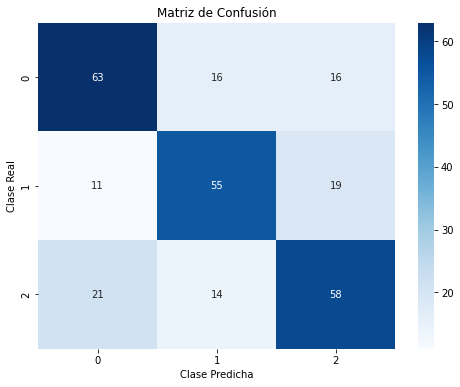

In [810]:
#Evaluación

print(f'MODELO: {M} - FIT: {f}')
print(f'Epochs = {total_epochs} - Batch Size = {batch}')

print(f'Trains: {i}')

print('#'*30)

print('TRAIN')

print(f'Accuracy: {final_accuracy:0.2f}')
print(f'Precision: {final_precision:0.2f}')
print(f'Recall: {final_recall:0.2f}')
print(f'F1 Score: {final_f1_score:0.2f}')

print('#'*30)

print('VALIDATION')


print(f'Accuracy: {final_val_accuracy:0.2f}')
print(f'Precision: {final_val_precision:0.2f}')
print(f'Recall: {final_val_recall:0.2f}')
print(f'F1 Score: {final_val_f1_score:0.2f}')

print('#'*30)

print('TEST')

evaluation = model.evaluate(x_test_s_r, y_test_one_hot_r, verbose = 0)

y_pred = model.predict(x_test_s_r)

y_pred = np.argmax(y_pred, axis=1)

targets = ['<5', '5-15', '15<']

print(f"Loss: {evaluation[0]:.2f}")
print(f"Accuracy: {evaluation[1]:.2f}")
print(f"Precision: {evaluation[2]:.2f}")
print(f"Recall: {evaluation[3]:.2f}")

f1_score = 2 * (evaluation[2] * evaluation[3]) / (evaluation[2] + evaluation[3])

print(f"F1 Score: {f1_score:.2f}")


report = classification_report(y_test_r, y_pred, target_names=targets)

print(report)

conf_matrix = confusion_matrix(y_test_r, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Clase Predicha")
plt.ylabel("Clase Real")
plt.title("Matriz de Confusión")
    
plt.show()

Hay un error en la salida de la evaluación en el nombre de las clases.

5-15 debería ser 6-15

15< debería ser 16<

In [811]:
#Guardado de modelos
#ruta = '../Archivos/nn_new_4_r'
#model.save(f'{ruta}_M{M}_loss_{evaluation[0]:.2f}_acc_{evaluation[1]:.2f}_pre_{evaluation[2]:.2f}_rec_{evaluation[3]:.2f}_f1_{f1_score:.2f}.h5')

d:\Program Files\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Random Forest

Realizo entrenamiento con Random Forest que fue el modelo de clasificación que mejor aprendió las características de los datos ahora con datos aumentados.

##### Modelo 1

De entrada con configuraciones sencillas ya da un accuracy mayor a las redes neuronales en su mejor modelo.

******Modelo: Random Forest******
              precision    recall  f1-score   support

         0.0       0.67      0.75      0.71       189
         1.0       0.68      0.68      0.68       170
         2.0       0.72      0.64      0.67       187

    accuracy                           0.69       546
   macro avg       0.69      0.69      0.69       546
weighted avg       0.69      0.69      0.69       546



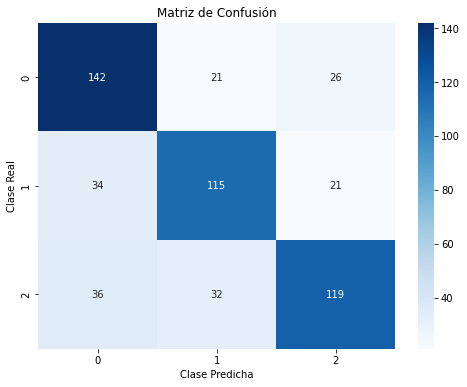

In [768]:
random_forest = RandomForestClassifier(n_estimators=200)

mod = Aplicar_Modelo(random_forest, 'Random Forest',x_train_r, y_train_r, x_test_r1, y_test_r1)

##### Modelo 2

******Modelo: Random Forest******
              precision    recall  f1-score   support

         0.0       0.69      0.73      0.71       189
         1.0       0.68      0.67      0.67       170
         2.0       0.71      0.67      0.69       187

    accuracy                           0.69       546
   macro avg       0.69      0.69      0.69       546
weighted avg       0.69      0.69      0.69       546



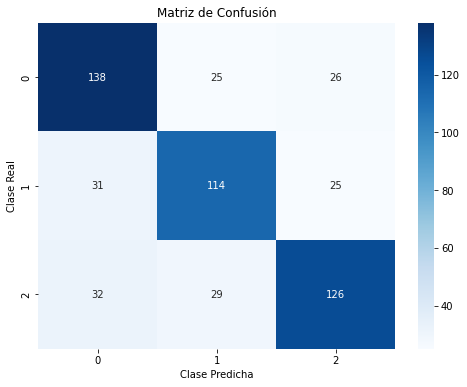

In [779]:
random_forest = RandomForestClassifier(n_estimators=100)

mod = Aplicar_Modelo(random_forest, 'Random Forest',x_train_r, y_train_r, x_test_r1, y_test_r1)

##### Modelo 3

              precision    recall  f1-score   support

         0.0       0.69      0.74      0.71       189
         1.0       0.71      0.62      0.66       170
         2.0       0.67      0.70      0.68       187

    accuracy                           0.69       546
   macro avg       0.69      0.69      0.69       546
weighted avg       0.69      0.69      0.69       546



Text(0.5, 1.0, 'Matriz de Confusión')

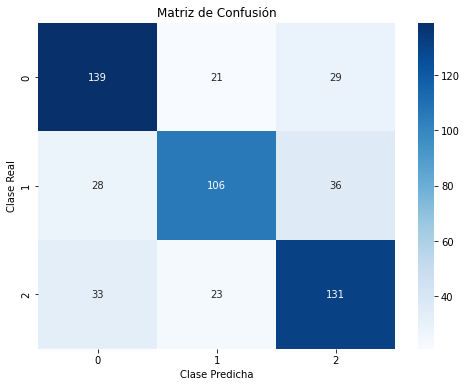

In [809]:
random_forest2 = RandomForestClassifier(n_estimators=100, n_jobs = 3, min_samples_split = 4, min_samples_leaf = 2)

random_forest2.fit(x_train_r, y_train_r)

y_pred_r = random_forest2.predict(x_test_r1)


class_report = classification_report(y_test_r1, y_pred_r)

print(class_report)

conf_matrix = confusion_matrix(y_test_r1, y_pred_r)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Clase Predicha")
plt.ylabel("Clase Real")
plt.title("Matriz de Confusión")


##### Modelo 4

Finalmente elijo este modelo ya que llegó al accuracy mínimo que cosidero como 'bueno' para la clasificación, teniendo en cuenta la complejidad de los datos.

              precision    recall  f1-score   support

         0.0       0.69      0.74      0.71       189
         1.0       0.72      0.64      0.68       170
         2.0       0.69      0.72      0.70       187

    accuracy                           0.70       546
   macro avg       0.70      0.70      0.70       546
weighted avg       0.70      0.70      0.70       546



Text(0.5, 1.0, 'Matriz de Confusión')

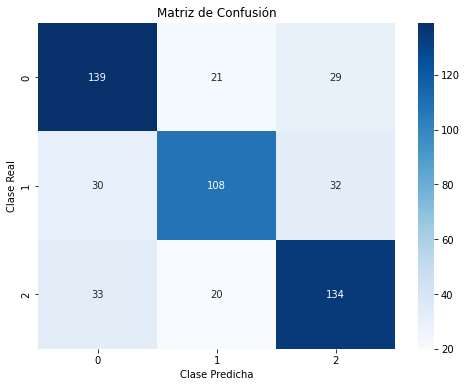

In [757]:
random_forest2 = RandomForestClassifier(n_estimators=200, n_jobs = 3, min_samples_split = 3, min_samples_leaf = 2,
                                        criterion = 'entropy')

random_forest2.fit(x_train_r, y_train_r)

y_pred_r = random_forest2.predict(x_test_r1)


class_report = classification_report(y_test_r1, y_pred_r)

print(class_report)

conf_matrix = confusion_matrix(y_test_r1, y_pred_r)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Clase Predicha")
plt.ylabel("Clase Real")
plt.title("Matriz de Confusión")


Guardo el modelo con los parámetros que mejor generalizaron el conjunto de test.

In [ ]:
#dump(random_forest2, '..\Archivos\modelo_random_forest_accu_0.71_pre_0.71_rec_0.70_f1_0.71.joblib')

Lo cargo ya que en memoria quedó otro

In [19]:
random_forest = load(r'..\Archivos\modelo_random_forest_accu_0.71_pre_0.71_rec_0.70_f1_0.71.joblib')

              precision    recall  f1-score   support

         0.0       0.72      0.71      0.72       189
         1.0       0.73      0.63      0.68       170
         2.0       0.68      0.77      0.72       187

    accuracy                           0.71       546
   macro avg       0.71      0.70      0.71       546
weighted avg       0.71      0.71      0.71       546



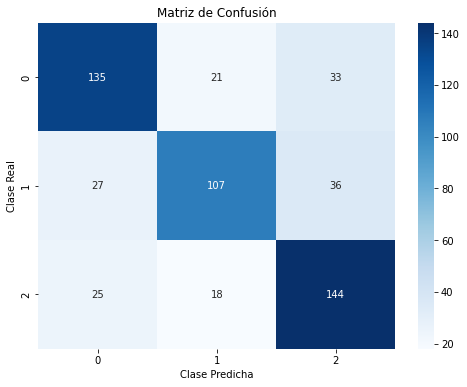

In [438]:
y_pred_r = random_forest.predict(x_test_r1)


class_report = classification_report(y_test_r1, y_pred_r)

print(class_report)

conf_matrix = confusion_matrix(y_test_r1, y_pred_r)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Clase Predicha")
plt.ylabel("Clase Real")
plt.title("Matriz de Confusión")
plt.savefig('..\img\Random_forest_test_performance_cm.png', bbox_inches='tight', pad_inches=0.2, facecolor='white')



In [43]:
feature_importance = random_forest.feature_importances_

features_names = ['Requester', 'Ticket Type', 'Requester Group', 'Priority', 'Impact', 'Category', 'Requester City', 'End User', 'Data Model',
          'Requester Country', 'Week Day', 'Open Date'] 

features = pd.DataFrame(features_names)

features.columns = ['Característica']

features['Importancia %'] = feature_importance * 100

features.round(2)

,Característica,Importancia %
0,Requester,3.12
1,Ticket Type,3.99
2,Requester Group,2.27
3,Priority,7.88
4,Impact,2.03
5,Category,12.43
6,Requester City,8.61
7,End User,15.48
8,Data Model,8.05
9,Requester Country,6.93
